In [162]:
import numpy as np
import pandas as pd

In [163]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import neighbors, model_selection, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [164]:
dataset = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
#se eliminan las filas que tienen valores nulos de cara a realizar posteriores estudios
#HABRIA QUE TENERLO IMPUTADO CON VALORES PERDIDOS!!
dataset.dropna(axis=0, inplace = True) 

In [165]:
atSalida = 'close'
atEntrada = ['open','high','low','volume']

dataset_output = dataset[atSalida].copy()
dataset.drop(atSalida, axis=1, inplace=True)
dataset = dataset[atEntrada].copy()

Por tanto , las columnas nulas son open, high y  low

# 3.3 Transformación de variables categóricas a numéricas

No se va a realizar dicho tipo de transformación , pues para el proyecto se realizará principalmente redes neuronales y regresión polinomial.

# 3.4 Reducción de datos

AGREGAR DESPUES VARIABLE FECHA!!!!!

# Obtención del rendimiento con todas las variables

Para comprobar la calidad de las técnicas de selección de variables, se va a calcular el rendimiento de una regresión polinomial  si utilizamos todas las variables. Nos hemos decidido por esta técnica, pues es fácil de implementar.

Se aplicará el método hold-out para obtener los conjuntos de entrenamiento y de test (70% de datos para entrenar).



SE ELIMINARAN LAS FILAS ASOCIADAS A LOS VALORES NULOS PARA PODER REALIZAR LAS COSAS!!! JUNTAR CON LO DE IVAN!

Rendimiento con regresión polinomial sobre todas las variables

In [166]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_output, test_size=0.2, random_state=12)

In [167]:
def regresion_polinomial(dataset,dataset_output, p_degree):
    # Generamos los conjuntos de entrenamiento y de test
    X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_output, test_size=0.2, random_state=12)
    # Creamos una Pipeline en la que generamos variables polinómicas de grado 2, estandarizamos los datos y aprendemos una regresión lineal
    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=p_degree)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    # Entrenamos la Pipeline
    pipePolinomial.fit(X_train, y_train)
    # Obtenemos el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
regresion_polinomial(dataset,dataset_output,2)

El error en entrenamiento es 0.4663 y en test es 0.4903


## Análisis de correlaciones

In [168]:
import matplotlib.pyplot as plt
correlaciones = X_train.corr(method ='pearson')
correlaciones

,open,high,low,volume
open,1.000000,0.999938,0.999927,-0.143243
high,0.999938,1.000000,0.999902,-0.142844
low,0.999927,0.999902,1.000000,-0.143780
volume,-0.143243,-0.142844,-0.143780,1.000000


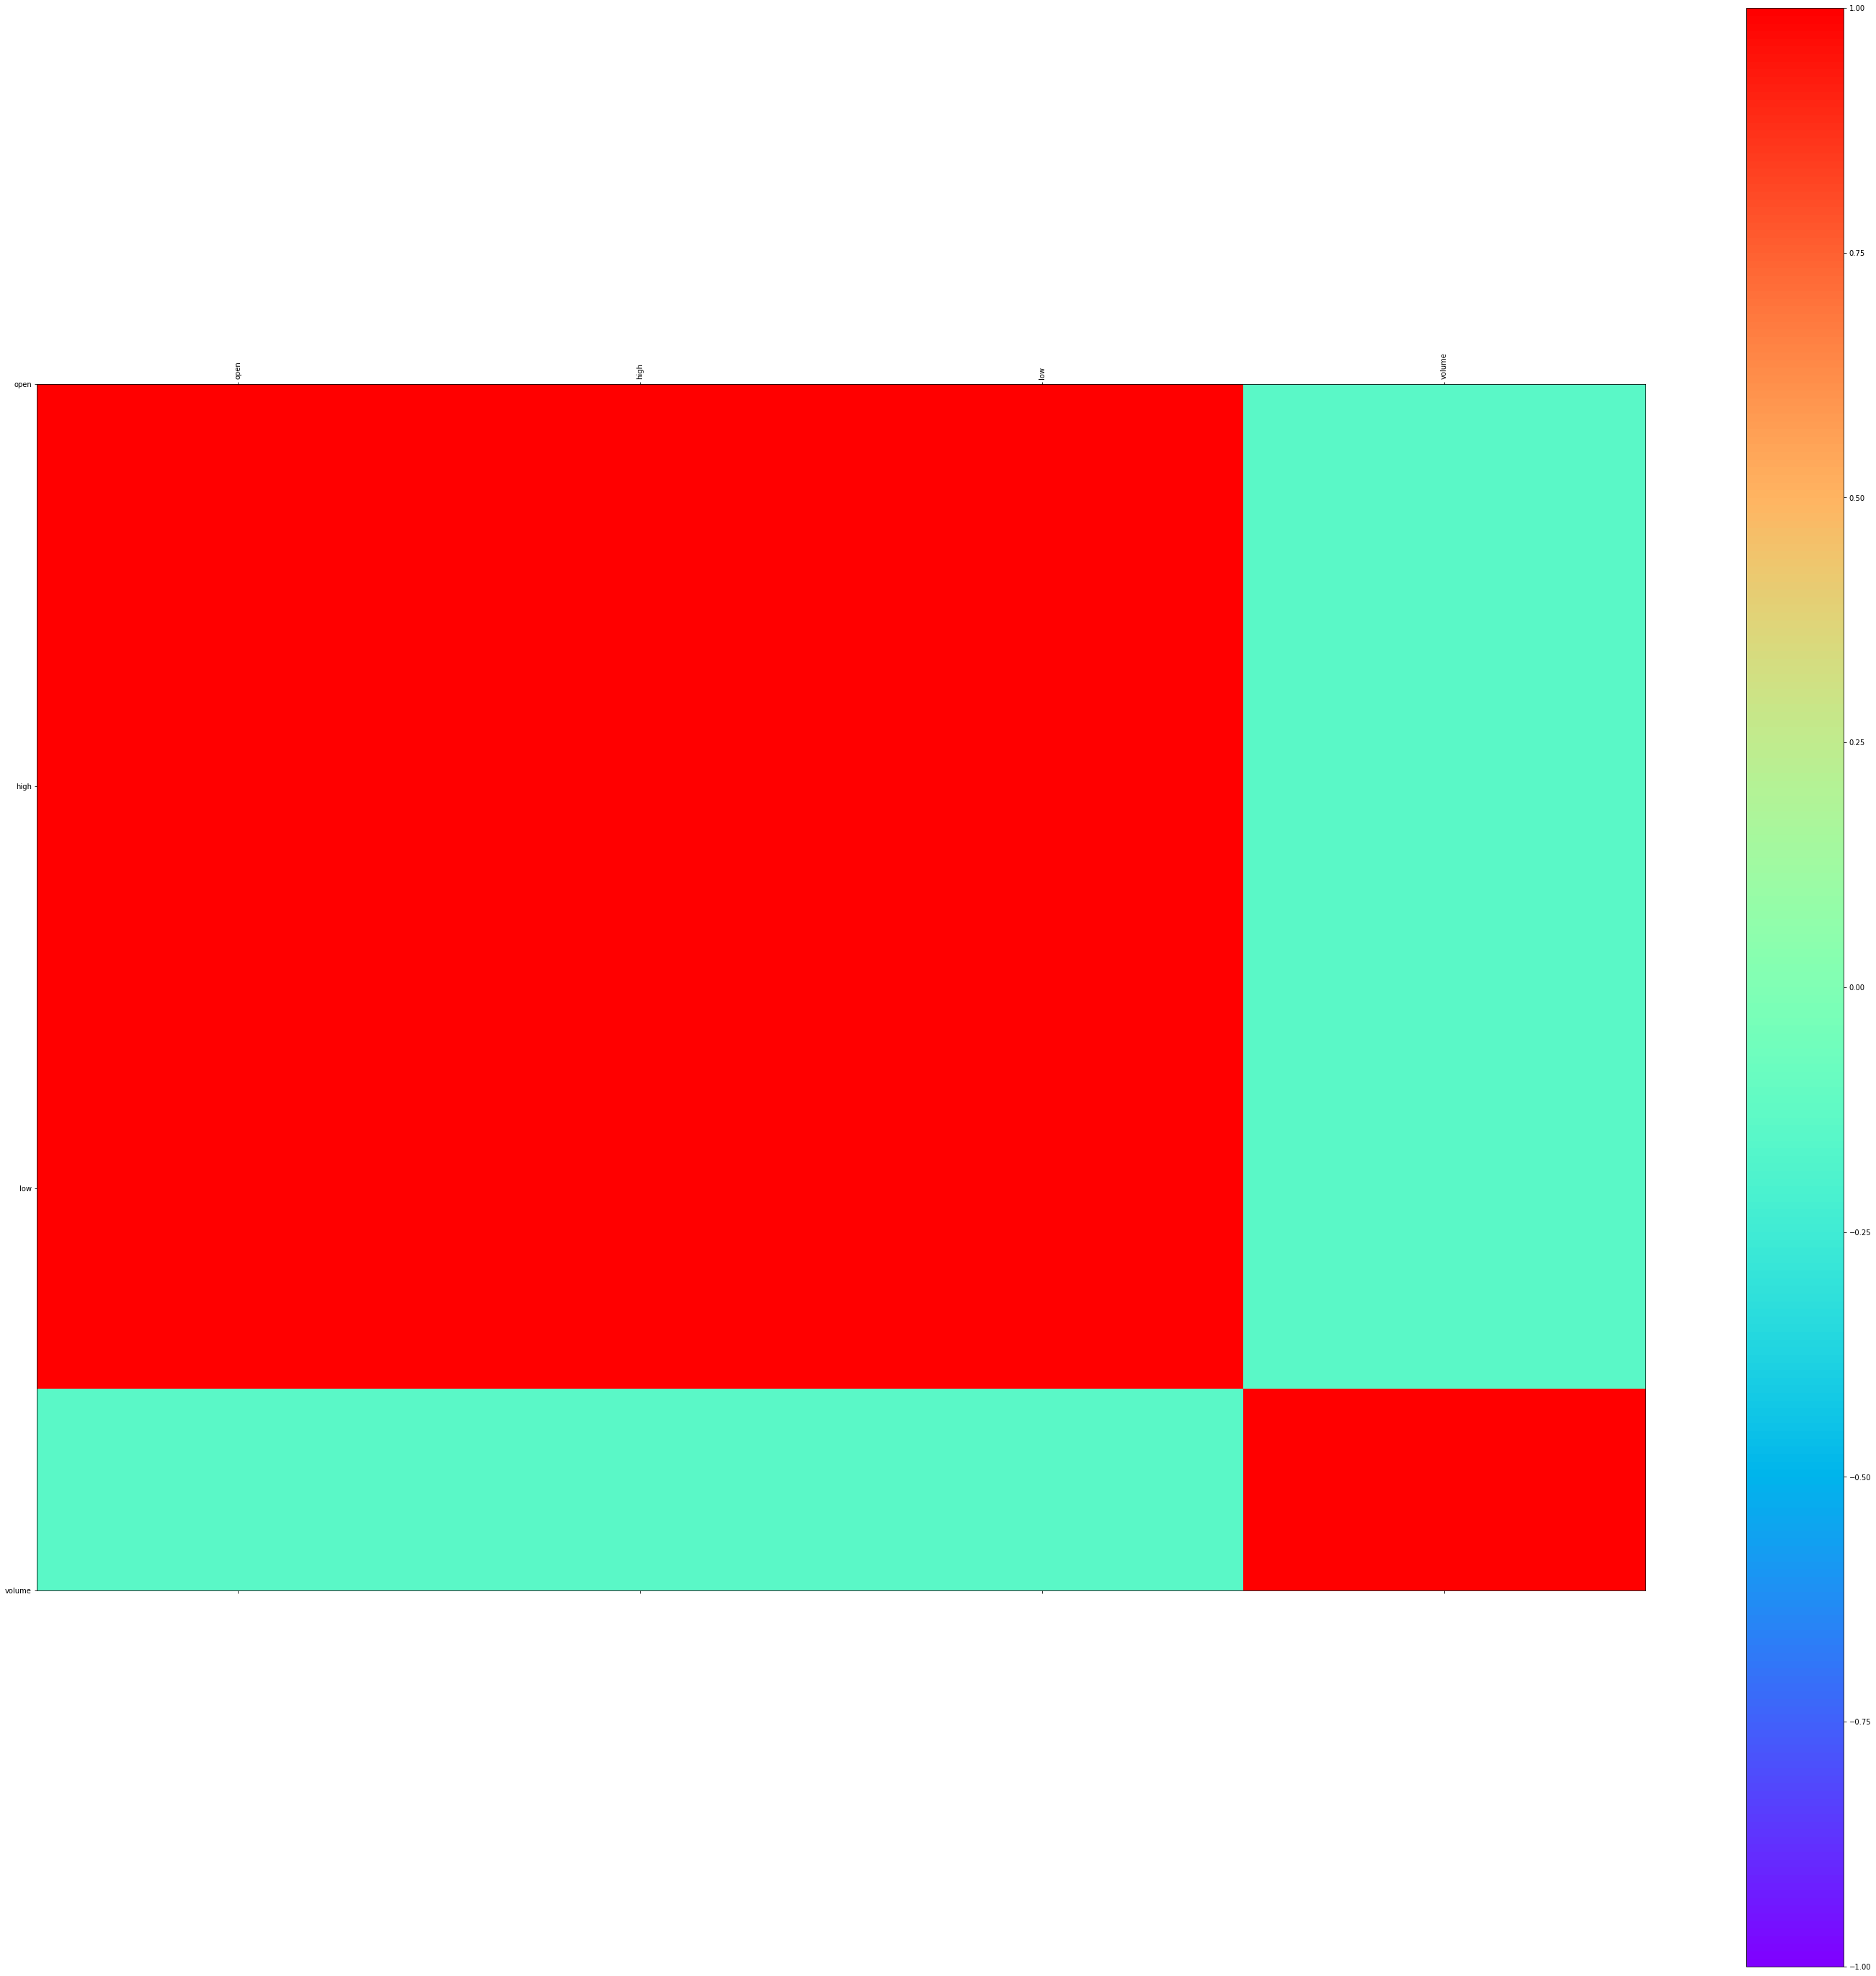

In [169]:
# Mostramos la matriz de correlaciones especificando el rango de los valores [-1, 1]
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
cax = ax.matshow(correlaciones, vmin=-1, vmax=1, cmap=plt.cm.rainbow)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# Añadimos los nombres de las variables en la figura
names = X_train.columns
ax.set_xticklabels(names, rotation='90')
ax.set_yticklabels(names)
plt.show()

Tras la obtención de matriz de correlaciones, se puede determinar que las variables de entrada están relacionadas entre si de manera muy alta, salvo el volumen.

Veamos ahora el rendimiento que se obtendría al eliminar una de éstas variables. Para hacer más completo el experimento, se procederá a crear 3 datasets distintos: cada uno eliminando una variable distinta.

*Eliminación* *de* *open*, *high*, *low* por separado

In [170]:
dataset1 = dataset.copy()
dataset_output1 = dataset_output.copy()

In [171]:
variables = ['open', 'high', 'low']   
for nombrevar in variables:
    X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    X_train = X_train.drop([nombrevar],axis=1)
    X_test = X_test.drop([nombrevar],axis=1)

    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    pipePolinomial.fit(X_train, y_train)

    #Se obtiene el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print(f"Resutados para la eliminacion de {nombrevar}")
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
    print()

Resutados para la eliminacion de open
El error en entrenamiento es 0.7150 y en test es 0.7317

Resutados para la eliminacion de high
El error en entrenamiento es 1.1110 y en test es 1.1582

Resutados para la eliminacion de low
El error en entrenamiento es 1.1819 y en test es 1.1106



*Eliminación* *por* *pares*

In [172]:
pares = [ ['open', 'high'] , ['open', 'low'] , ['high', 'low']]   
for par in pares:
    X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    
    X_train = X_train.drop([par[0]],axis=1)
    X_train = X_train.drop([par[1]],axis=1)

    X_test = X_test.drop([par[0]],axis=1)
    X_test = X_test.drop([par[1]],axis=1)


    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    pipePolinomial.fit(X_train, y_train)

    #Se obtiene el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print(f"Resutados para la eliminacion de {par[0]} y {par[1]}")
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
    print()

Resutados para la eliminacion de open y high
El error en entrenamiento es 1.1283 y en test es 1.1791

Resutados para la eliminacion de open y low
El error en entrenamiento es 1.1996 y en test es 1.1292

Resutados para la eliminacion de high y low
El error en entrenamiento es 2.4314 y en test es 2.4117



*Eliminación* *de* *las* *tres* *variables*

In [173]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    
X_train = X_train.drop(['open'] ,axis=1)
X_train = X_train.drop(['low'],axis=1)
X_train = X_train.drop(['high'] ,axis=1)

X_test = X_test.drop(['open'] ,axis=1)
X_test = X_test.drop(['low'],axis=1)
X_test = X_test.drop(['high'] ,axis=1)

pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
pipePolinomial.fit(X_train, y_train)

#Se obtiene el rendimiento en entrenamiento y en test (MSE)
prTrain = pipePolinomial.predict(X_train)
errorTrain = mean_squared_error(y_train, prTrain)
prTest = pipePolinomial.predict(X_test)
errorTest = mean_squared_error(y_test, prTest)
print("Resultado para la eliminacion de high, low, y open")
print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
print()

Resultado para la eliminacion de high, low, y open
El error en entrenamiento es 9129.4072 y en test es 9497.4260



Tras los experimentos realizados, se puede observar que se obtiene un peor resultado al tratar de eliminar cualquiera de las tres variables que cuentan con una mayor correlación -casi perfecta- .

Por otro lado, en caso de eliminar una variable,la que menos impacto tiene en el rendimiento del modelo es 'open', y la que más influye es 'high'. 

En caso de eliminar dos variables,el mayor impacto negativo en el rendimiento vendrá dado por la eliminación de conjunta de 'low' y 'high'. Cosa que es natural, pues representa el valor más bajo y más alto de las acciones de una empresa en un día.

La eliminación de 'high', 'low' y 'open' provoca un desenlace nefasto y esperado, pues predecir el valor al final del día de las acciones a partir del volumen de acciones negociadas es sumamente complicado 

# Comparativas de métodos

In [126]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# LSTM

 La característica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente.

De manera sencilla, pueden ser pensadas como múltiples copias de la misma red, cada una pasando un mensaje a su sucesor. Por lo que, gracias a su naturaleza, pueden ser relacionadas con listas o secuencias.

Las LSTM pueden aprender dependencias largas, por lo que se podría decir que tienen una «memoria» a más largo plazo. Lo que les hace atractivas para este tipo de problemas, donde la información pasada puede jugar un papel importante.

INSERTAR IMAGEN!!!!

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
#Importacion de librerias necesarias para la red neuronal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [148]:
#Lectura de datos
todataframe = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
todataframe.dropna(axis=0, inplace = True) 

La comparativa del método se hará con la empresa AAl. Se ha probado a obtener el resultado de salida,mediante el uso únicamente de la variable 'close'. Se ha elegido un Epoch de 100 , que significará que el número de veces que se ejecutará forward propagation y backpropagation será de 100.

In [149]:
df = todataframe[todataframe['Name']=='AAL']

In [150]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [151]:
#Crear un conjunto de entrenamiento y de test (70% para train, 30% para test)
numero_ejemplos_entrenamiento = int(len(df)*0.7)
training_set = df.iloc[:numero_ejemplos_entrenamiento, 4:5].values
test_set = df.iloc[numero_ejemplos_entrenamiento:, 4:5].values

In [152]:
# Feature Scaling: estandarizacion para la red
sc = MinMaxScaler(feature_range = (0, 1))
#crear una estructura de datos con 60 time-steps y 1 salida
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [153]:
model = Sequential()#Agregar la primera capa y  Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Agregar la segunda capa y  Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Agregar la tercera capa y Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Agregar la cuarta capa y Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Agregar la capa de salida
model.add(Dense(units = 1))

# Compilar RNN: red neuronal recurrente
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting RNN con el Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 95ms/step - loss: 0.1537
Epoch 2/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0164
Epoch 3/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0087
Epoch 4/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0076
Epoch 5/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0077
Epoch 6/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0073
Epoch 7/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0078
Epoch 8/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0073 0s - loss
Epoch 9/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0074
Epoch 10/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0078
Epoch 11/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0082
Epoch 12/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0060
Epo

24/24 [==============================] - 3s 111ms/step - loss: 0.0023
Epoch 100/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0023


In [154]:
# Obtener las predicciones
dataset_train = df.iloc[:numero_ejemplos_entrenamiento, 1:2]
dataset_test = df.iloc[numero_ejemplos_entrenamiento:, 1:2]

In [155]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

In [156]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [157]:
tostore_test_result = []
for i in range(60,inputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = model.predict(tostore_test_result)

In [158]:
prediccion_resultante = scalerdata.inverse_transform(myclosing_priceresult)

In [159]:
resultados_reales = df['close'].iloc[numero_ejemplos_entrenamiento:]
resultados_reales = np.array(resultados_reales).reshape(-1,1)

In [160]:
mean_squared_error(resultados_reales,prediccion_resultante)

1.4461697060073808

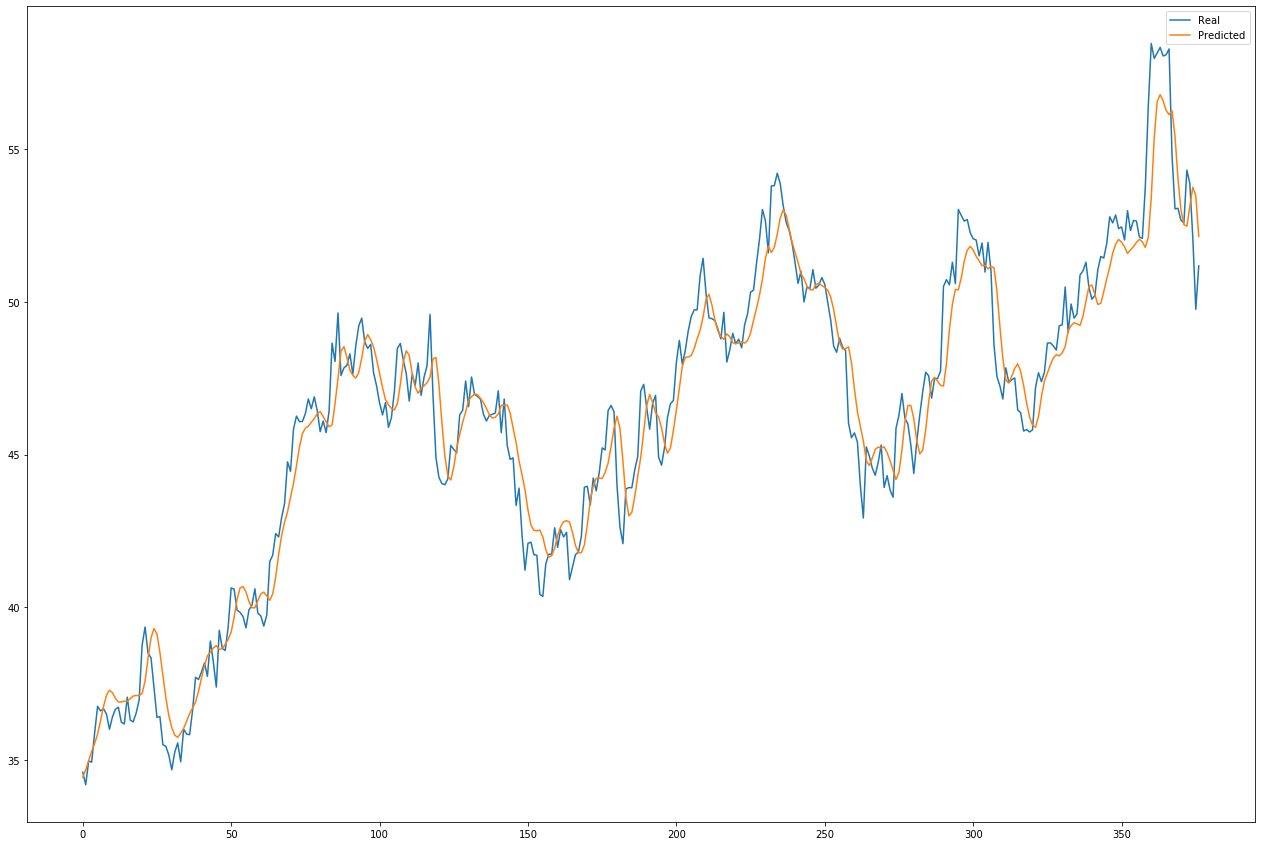

In [161]:
#Grafico con los resultados
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(resultados_reales[start:end], label='Resultados reales')
pred = plt.plot(prediccion_resultante[start:end], label='Resultados predecidos')

plt.legend(['Real', 'Predicted'])

plt.show()

Pese a solo contar con una única variable de entrada, se obtiene un error cuadrático medio mas o menos aceptable. Queda pendiente para un futuro, probar con un Epoch mayor y buscar alguna que otra configuración de la red más óptima.

-------------------------------------------

# Regresión polinomial

In [142]:
todataframe = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
todataframe.dropna(axis=0, inplace = True) 
todataframe = todataframe[todataframe['Name']=='AAL']

In [143]:
todataframe.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [144]:
atSalida = 'close'
atEntrada = ['open','high','low','volume']

todataframe_output = todataframe[atSalida].copy()
todataframe.drop(atSalida, axis=1, inplace=True)
todataframe = todataframe[atEntrada].copy()

In [146]:
grados= [2,3,4]

for grado in grados:
    print(f"Ejecucion para regresion polinomial de grado {grado}")
    regresion_polinomial(todataframe,todataframe_output,grado)
    print("------------------------------------------------------")

Ejecucion para regresion polinomial de grado 2
El error en entrenamiento es 0.1138 y en test es 0.1101
------------------------------------------------------
Ejecucion para regresion polinomial de grado 3
El error en entrenamiento es 0.1036 y en test es 0.1452
------------------------------------------------------
Ejecucion para regresion polinomial de grado 4
El error en entrenamiento es 0.0945 y en test es 0.9647
------------------------------------------------------


*Observaciones*: Se puede apreciar que al usar una regresión polinomial con grado 4 se obtienen peores resultados en test, debido a que el modelo aprende demasiado bien el conjunto de entrenamiento.

**Conclusiones** **sobre** **comparativa** **de** **métodos**

Se obtiene un mejor rendimiento aplicando la regresión polinomial, pero ha de tenerse en cuenta que en ésta el número de variables de entrada a utilizar ha sido mayor. Luego para nuestro experimento ha dado mejor resultado, pero en otras condiciones probablemente no sea así por la característica intrínsica de las LSTM.